<a href="https://colab.research.google.com/github/ZeynepRuveyda/Automi_projects/blob/main/OpenCVmeasuring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [175]:
image = cv2.imread('/content/drive/My Drive/Exxelia/ring_last.png')

# Gray, blur, adaptive threshold
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (3,3), 0)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]


# Morphological transformations
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

# Find contours
cnts = cv2.findContours(opening, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

In [182]:

for c in cnts:
    # Find perimeter of contour
    perimeter = cv2.arcLength(c, True)
    # Perform contour approximation
    approx = cv2.approxPolyDP(c, 0.04 * perimeter, True)

    # We assume that if the contour has more than a certain
    # number of verticies, we can make the assumption
    # that the contour shape is a circle
    if len(approx) > 6:

        # Obtain bounding rectangle to get measurements
        x,y,w,h = cv2.boundingRect(c)

        # Find measurements
        diameter = w
        radius = w/2

        # Find centroid
        M = cv2.moments(c)
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])

        # Draw the contour and center of the shape on the image
        cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),4)
        cv2.drawContours(image,[c], 0, (36,255,12), 4)
        cv2.circle(image, (cX, cY), 15, (320, 159, 22), -1) 

        # Draw line and diameter information 
        cv2.line(image, (x, y + int(h/2)), (x + w, y + int(h/2)), (156, 188, 24), 3)
        cv2.putText(image, "Diameter: {}".format(diameter), (cX - 50, cY - 50), cv2.FONT_HERSHEY_SIMPLEX, 3, (156, 188, 24), 3)



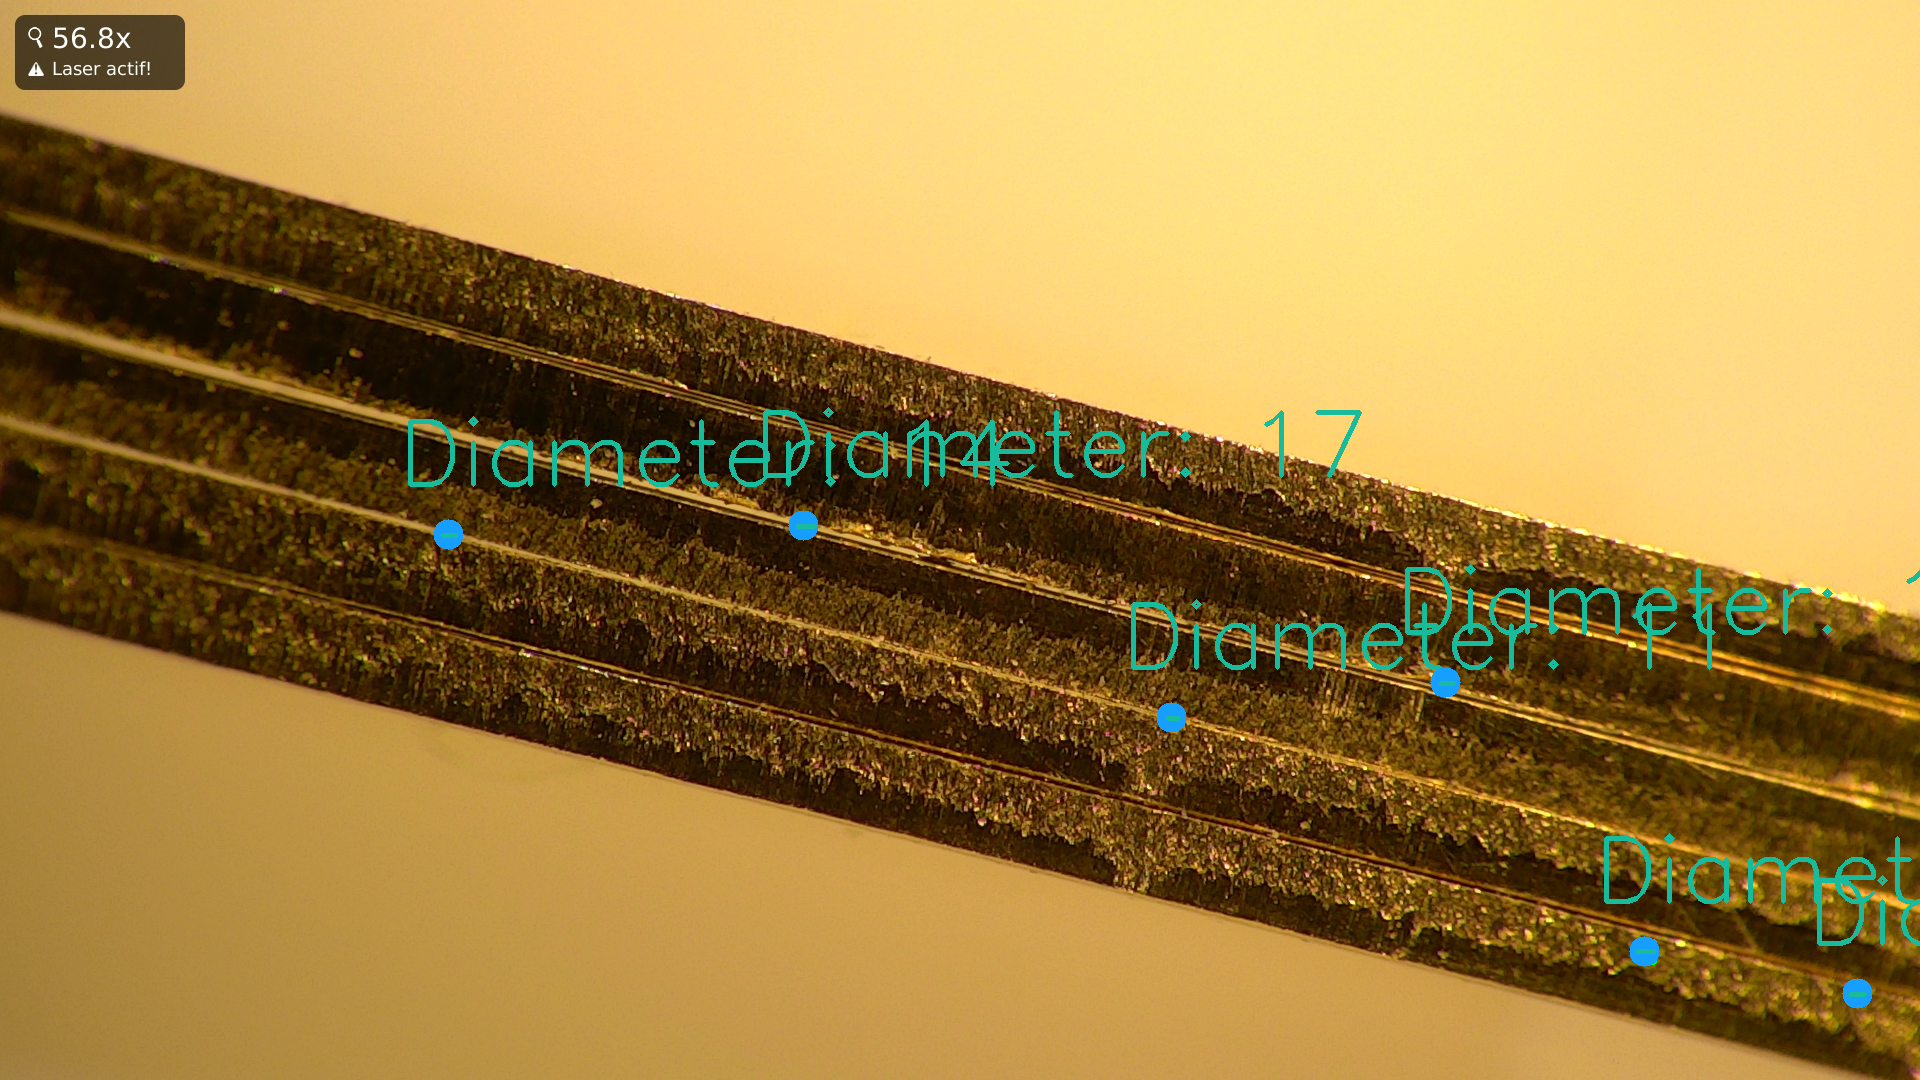

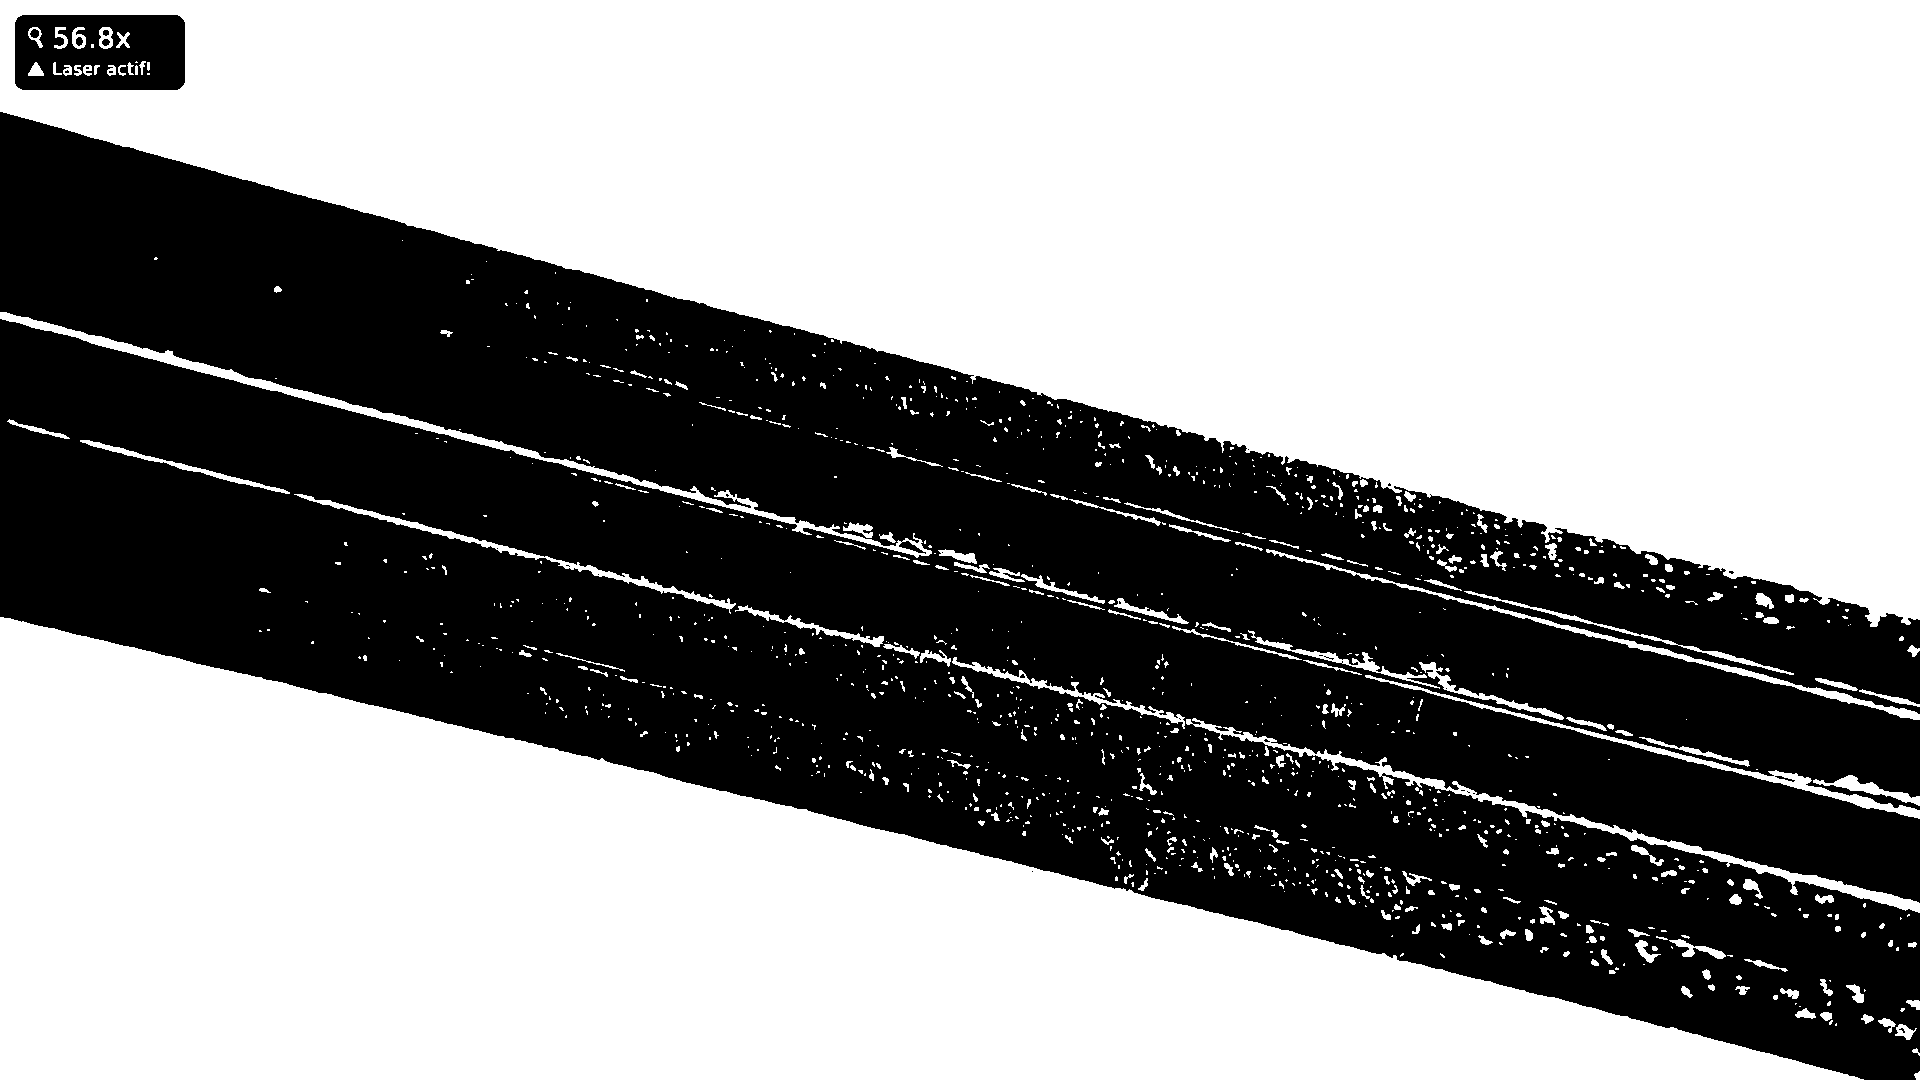

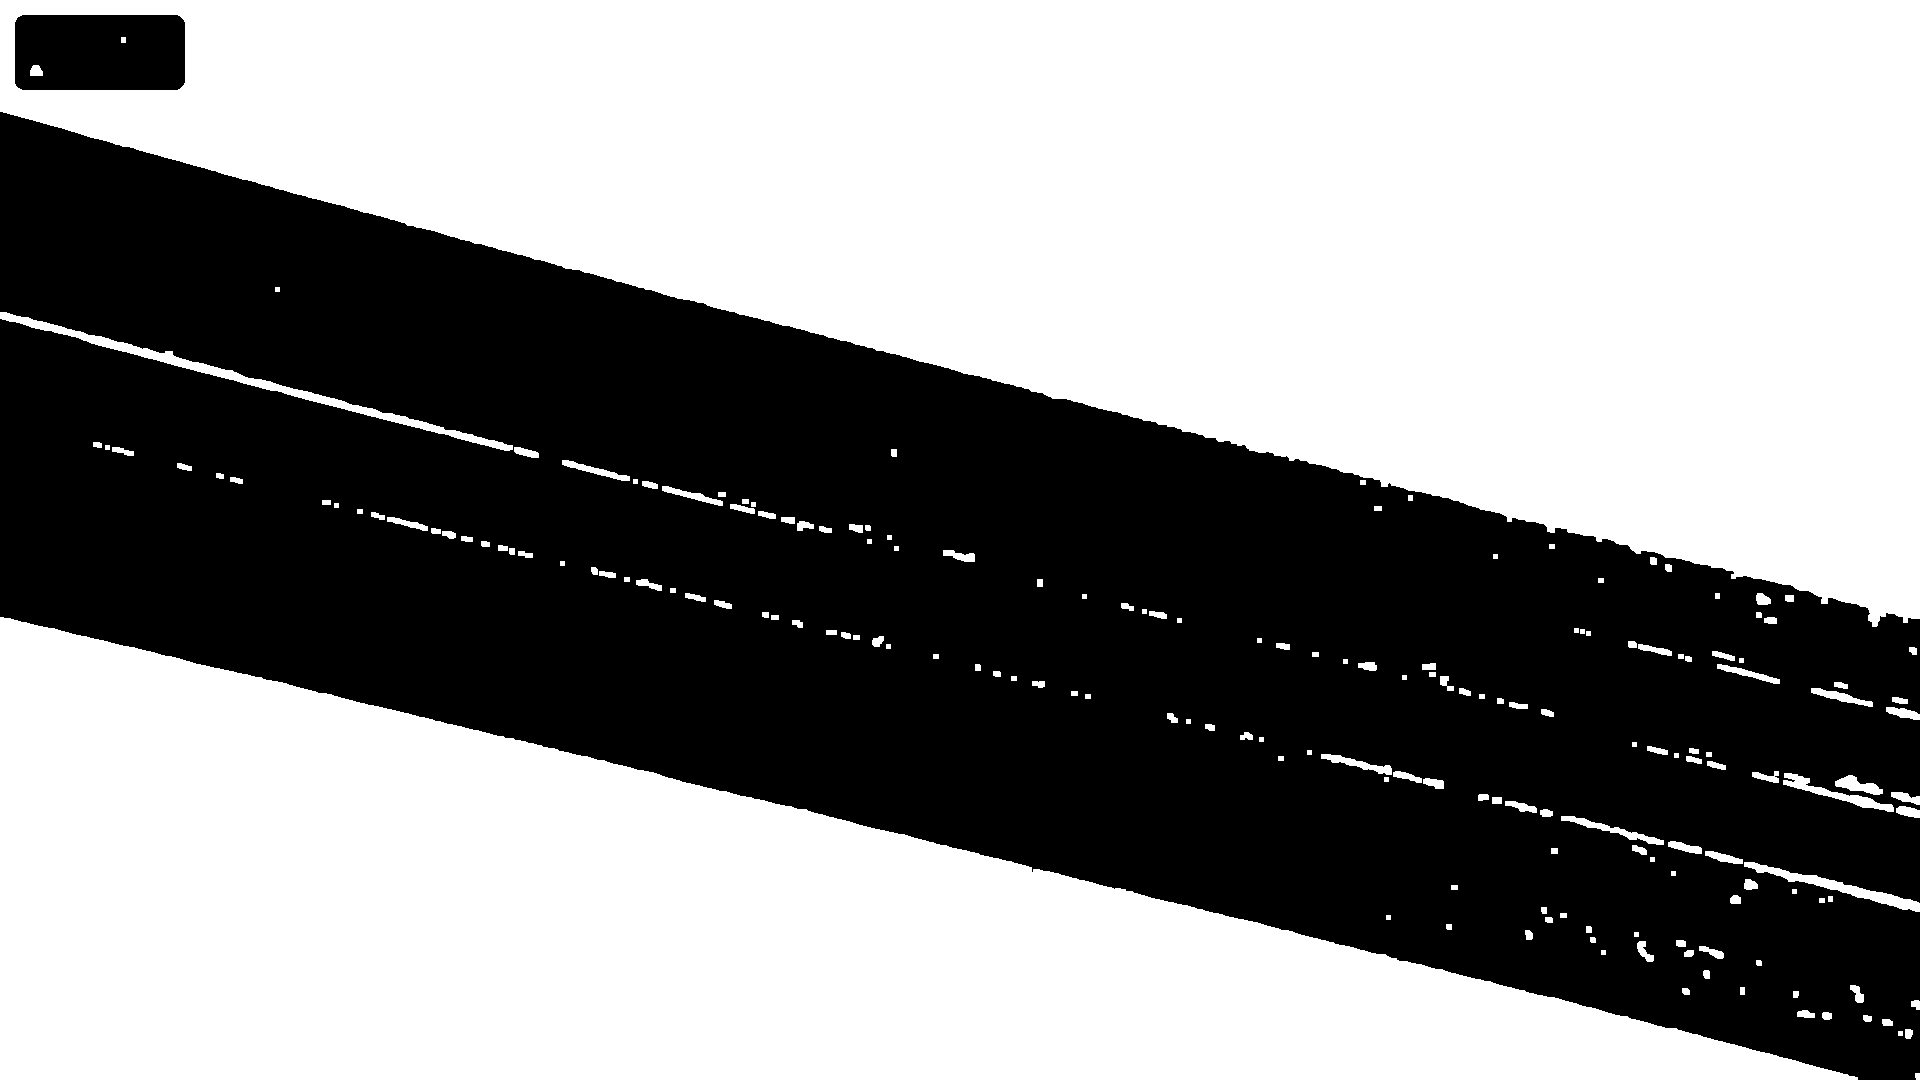

In [183]:
cv2_imshow(image)
cv2_imshow(thresh)
cv2_imshow(opening)

In [ ]:
cv2.imwrite('/content/drive/My Drive/Exxelia/image5.png', image)
cv2.imwrite('/content/drive/My Drive/Exxelia/thresh2.png', thresh)
cv2.imwrite('/content/drive/My Drive/Exxelia/opening2.png', opening)

True